# 时间序列处理
* 产生时间序列
* 时间数据选择
* Leading和lagging

#### 处理dataframe时，经常会遇到时间类型数据，本次课会介绍时间序列处理的常见function

In [2]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv('stock.csv')

## 产生时间序列
* 单一时间产生
* 一系列时间产生

### 单一时间产生 

In [3]:
ts = pd.Timestamp('2000-01-01 00:00')

In [4]:
s1 = pd.Series(101.7, index=[ts])
s1

2000-01-01    101.7
dtype: float64

In [5]:
s1.index

DatetimeIndex(['2000-01-01'], dtype='datetime64[ns]', freq=None)

### 一系列时间产生

In [6]:
dts = pd.date_range('2000-01-01',  freq='M',periods=10)
ts = pd.Series(np.random.randn(len(dts)), index=dts)
ts

2000-01-31   -0.635489
2000-02-29    0.189415
2000-03-31   -2.523849
2000-04-30   -0.043674
2000-05-31    0.983480
2000-06-30    1.134883
2000-07-31    0.995807
2000-08-31   -0.872080
2000-09-30    0.454916
2000-10-31    1.008104
Freq: M, dtype: float64

In [7]:
# Create a year's worth of business dates
dts = pd.date_range('2000-01-01', '2001-12-31', freq='B')
ts = pd.Series(np.random.randn(len(dts)), index=dts)
ts.head()

2000-01-03   -0.647028
2000-01-04    0.575257
2000-01-05    0.723829
2000-01-06   -0.661101
2000-01-07   -0.603149
Freq: B, dtype: float64

In [7]:
pd.date_range('2020-02-27','2020-03-11',freq='B')

s1=pd.Series(range(10),index=pd.date_range('2020-02-27','2020-03-11',freq='B'))

## 时间数据选择

In [8]:
ts['2000-03-20'] # ts.loc['2000-03-20']

1.3230961348459032

In [9]:
ts['20000320']

1.3230961348459032

In [10]:
ts['2000-03-24':'2000-03-30']

2000-03-24    0.339255
2000-03-27   -1.463714
2000-03-28    1.352939
2000-03-29   -0.502043
2000-03-30   -0.077271
Freq: B, dtype: float64

#### 通过month选择

In [14]:
ts['2000-02']

2000-02-01    1.243706
2000-02-02   -0.833905
2000-02-03   -1.201214
2000-02-04   -0.604911
2000-02-07    0.301704
2000-02-08   -0.682359
2000-02-09    0.279008
2000-02-10    1.435486
2000-02-11    1.471774
2000-02-14    0.599674
2000-02-15   -0.401574
2000-02-16    0.788186
2000-02-17    1.090952
2000-02-18    0.640494
2000-02-21    0.704782
2000-02-22   -0.562190
2000-02-23    1.578145
2000-02-24    0.929026
2000-02-25    0.438870
2000-02-28   -0.278254
2000-02-29    1.492881
Freq: B, dtype: float64

#### 通过年份选择

In [13]:
ts['2000']

2000-01-03   -0.647028
2000-01-04    0.575257
2000-01-05    0.723829
2000-01-06   -0.661101
2000-01-07   -0.603149
                ...   
2000-12-25   -1.902120
2000-12-26    1.825931
2000-12-27   -1.513815
2000-12-28    1.214950
2000-12-29   -0.949206
Freq: B, Length: 260, dtype: float64

## Leading and Lagging
* Lagging
* Leading
* Shift
* Tshift
* Diff


### Lagging

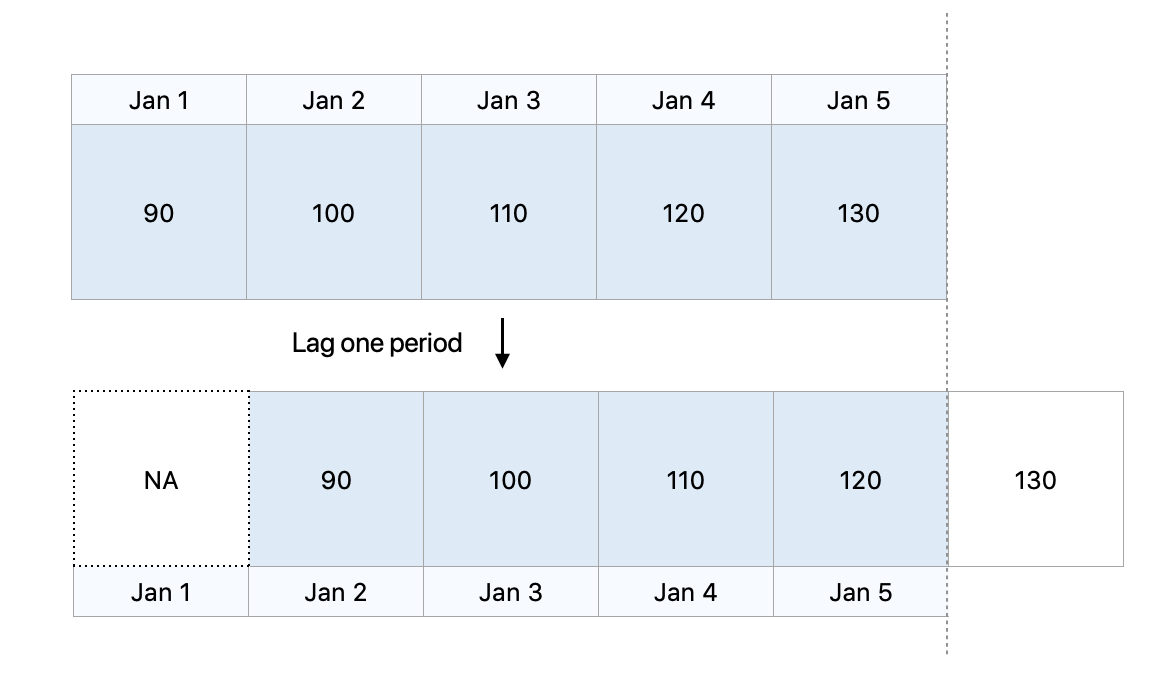

In [10]:
image('lag.png')

### Leading

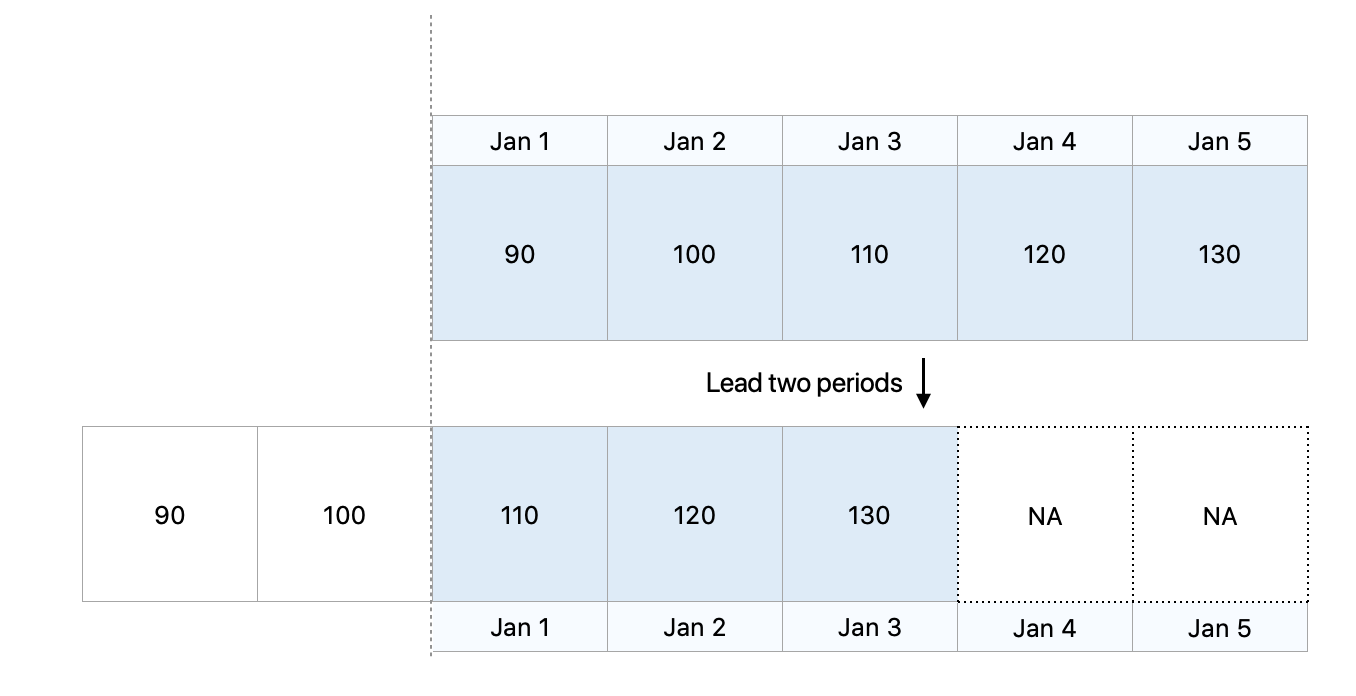

In [13]:
image('lead.png')

### Shift - index不更新

In [15]:
ts['2000-01']

2000-01-03   -0.647028
2000-01-04    0.575257
2000-01-05    0.723829
2000-01-06   -0.661101
2000-01-07   -0.603149
2000-01-10    0.821449
2000-01-11    0.767641
2000-01-12   -0.981270
2000-01-13    0.280138
2000-01-14   -1.160459
2000-01-17   -0.196531
2000-01-18   -2.635773
2000-01-19    0.363950
2000-01-20   -1.185990
2000-01-21    0.277159
2000-01-24   -0.341839
2000-01-25   -0.244009
2000-01-26   -1.511807
2000-01-27    0.034942
2000-01-28    0.537412
2000-01-31   -0.086110
Freq: B, dtype: float64

In [16]:
ts2k = ts['2000-01'].copy()
ts2k.shift(1)

2000-01-03         NaN
2000-01-04   -0.647028
2000-01-05    0.575257
2000-01-06    0.723829
2000-01-07   -0.661101
2000-01-10   -0.603149
2000-01-11    0.821449
2000-01-12    0.767641
2000-01-13   -0.981270
2000-01-14    0.280138
2000-01-17   -1.160459
2000-01-18   -0.196531
2000-01-19   -2.635773
2000-01-20    0.363950
2000-01-21   -1.185990
2000-01-24    0.277159
2000-01-25   -0.341839
2000-01-26   -0.244009
2000-01-27   -1.511807
2000-01-28    0.034942
2000-01-31    0.537412
Freq: B, dtype: float64

In [17]:
ts2k = ts['2000-01'].copy()
ts2k.shift(2).iloc[[0, 1, 2, -2, -1]] # show first and last few rows

2000-01-03         NaN
2000-01-04         NaN
2000-01-05   -0.647028
2000-01-28   -1.511807
2000-01-31    0.034942
dtype: float64

### Tshift - index更新

In [8]:
s1.tshift(1)

2020-02-28    0
2020-03-02    1
2020-03-03    2
2020-03-04    3
2020-03-05    4
2020-03-06    5
2020-03-09    6
2020-03-10    7
2020-03-11    8
2020-03-12    9
Freq: B, dtype: int64

In [9]:
s1.shift(1)

2020-02-27    NaN
2020-02-28    0.0
2020-03-02    1.0
2020-03-03    2.0
2020-03-04    3.0
2020-03-05    4.0
2020-03-06    5.0
2020-03-09    6.0
2020-03-10    7.0
2020-03-11    8.0
Freq: B, dtype: float64

In [10]:
s1

2020-02-27    0
2020-02-28    1
2020-03-02    2
2020-03-03    3
2020-03-04    4
2020-03-05    5
2020-03-06    6
2020-03-09    7
2020-03-10    8
2020-03-11    9
Freq: B, dtype: int64

### Diff - 计算数据变化

In [20]:
ts2k-ts2k.shift(1)

2000-01-03         NaN
2000-01-04    1.222284
2000-01-05    0.148573
2000-01-06   -1.384931
2000-01-07    0.057952
2000-01-10    1.424598
2000-01-11   -0.053808
2000-01-12   -1.748910
2000-01-13    1.261408
2000-01-14   -1.440597
2000-01-17    0.963928
2000-01-18   -2.439242
2000-01-19    2.999723
2000-01-20   -1.549940
2000-01-21    1.463149
2000-01-24   -0.618997
2000-01-25    0.097829
2000-01-26   -1.267798
2000-01-27    1.546749
2000-01-28    0.502470
2000-01-31   -0.623522
Freq: B, dtype: float64

In [19]:
ts2k.diff(1)

2000-01-03         NaN
2000-01-04    1.222284
2000-01-05    0.148573
2000-01-06   -1.384931
2000-01-07    0.057952
2000-01-10    1.424598
2000-01-11   -0.053808
2000-01-12   -1.748910
2000-01-13    1.261408
2000-01-14   -1.440597
2000-01-17    0.963928
2000-01-18   -2.439242
2000-01-19    2.999723
2000-01-20   -1.549940
2000-01-21    1.463149
2000-01-24   -0.618997
2000-01-25    0.097829
2000-01-26   -1.267798
2000-01-27    1.546749
2000-01-28    0.502470
2000-01-31   -0.623522
Freq: B, dtype: float64

### 课后练习

In [82]:
sp5_df = pd.read_csv(
    'sp500.csv', usecols=['date', 'adj_close'], 
    parse_dates=['date'])

产生一个时间数据 January 1st, 1993 16:00 

In [84]:
pd.Timestamp('1993-01-01 16:00')

Timestamp('1993-01-01 16:00:00')

产生一个时间index:

从2010-1-1开始，每5天.

从2010-1-1到2010-1-15，所有的工作日



In [85]:
pd.date_range(start='2010-01-01', periods=5, freq='D')

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05'],
              dtype='datetime64[ns]', freq='D')

In [86]:
pd.date_range(start='2010-01-01', end='2010-01-15', freq='B')

DatetimeIndex(['2010-01-01', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14', '2010-01-15'],
              dtype='datetime64[ns]', freq='B')

通过sp5_df的adj_close产生一个series,date作为index,并且对index排序. 新series的名字为sp5


In [88]:
sp5 = pd.Series( # __
    sp5_df.adj_close.values, index=sp5_df.date, 
    name='adj_close').sort_index()

In [90]:
sp5.head()

date
1950-01-03    16.66
1950-01-04    16.85
1950-01-05    16.93
1950-01-06    16.98
1950-01-09    17.08
Name: adj_close, dtype: float64

用两种不同的方法选择1995,1,3

In [94]:

d1a = sp5['19950103'] # __
d1b = sp5['1995-01-03'] # __
d1c = sp5[datetime.datetime(1995, 1, 3)] # __

选择sp5中所有1995年3月的数据

In [96]:
sp5['1995-03']

date
1995-03-01    485.649994
1995-03-02    485.130005
1995-03-03    485.420013
1995-03-06    485.630005
1995-03-07    482.119995
1995-03-08    483.140015
1995-03-09    483.160004
1995-03-10    489.570007
1995-03-13    490.049988
1995-03-14    492.890015
1995-03-15    491.880005
1995-03-16    495.410004
1995-03-17    495.519989
1995-03-20    496.140015
1995-03-21    495.070007
1995-03-22    495.670013
1995-03-23    495.950012
1995-03-24    500.970001
1995-03-27    503.200012
1995-03-28    503.899994
1995-03-29    503.119995
1995-03-30    502.220001
1995-03-31    500.709991
Name: adj_close, dtype: float64

### 课后练习

In [97]:
sp5_df = pd.read_csv(
    'sp500.csv', usecols=['date', 'adj_close'], 
    parse_dates=['date'])

计算每一天adj_close相较于前一天变化的百分比

In [99]:
sp5_df['adj_close'] / sp5_df['adj_close'].shift(1) - 1

0             NaN
1       -0.009570
2        0.002747
3       -0.002779
4        0.012121
5       -0.010398
6        0.010248
7        0.003219
8       -0.006291
9        0.002044
10      -0.004331
11      -0.008740
12      -0.000545
13       0.000378
14       0.006427
15       0.000878
16      -0.000985
17      -0.004386
18      -0.006552
19      -0.005569
20       0.001840
21       0.001263
22      -0.016131
23      -0.000156
24      -0.005027
25       0.011368
26      -0.000884
27      -0.003295
28      -0.003487
29      -0.004078
           ...   
16646    0.000000
16647    0.010551
16648    0.002320
16649   -0.004051
16650    0.001162
16651    0.005223
16652   -0.001732
16653   -0.003470
16654   -0.010447
16655    0.000000
16656   -0.001759
16657   -0.011751
16658   -0.005351
16659    0.000598
16660    0.007169
16661    0.003559
16662   -0.001182
16663   -0.001775
16664   -0.001186
16665    0.000594
16666   -0.008304
16667   -0.002990
16668    0.005399
16669    0.019690
16670   -0

用resample计算sp5_df的 adj_close 的月平均值

In [101]:
sp5_df.set_index('date').resample('M').mean()

,adj_close
date,
1950-01-31,16.875714
1950-02-28,17.192778
1950-03-31,17.346522
1950-04-30,17.845263
1950-05-31,18.434546
1950-06-30,18.736818
1950-07-31,17.384000
1950-08-31,18.433044
1950-09-30,19.084500
